In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [2]:
# Step 1:Loading the news article dataset
file_path = 'news-article-categories clean.csv'
data = pd.read_csv(file_path)

C:\Users\zobayer\AppData\Local\Temp\ipykernel_7388\1450519326.py:3: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,2

In [9]:
# Combine 'title' and 'body' columns into a single 'text' column
data['text'] = data['title'] + " " + data['body']
data = data.dropna(subset=['text', 'category'])  # Drop rows with missing values

In [10]:
# Features (X) and target (y)
X = data['text']
y = data['category']

In [11]:
# Step 2: Define a pipeline with TF-IDF and GaussianNB
# GaussianNB expects dense matrix, so using FunctionTransformer to convert sparse to dense
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('gnb', GaussianNB())
])

In [12]:
# Step 3: Define hyperparameters for TF-IDF to optimize
param_grid = {
    'tfidf__max_df': [0.7, 1.0],  # Ignore very frequent words
    'tfidf__min_df': [1, 2],      # Ignore very rare words
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams and bigrams
    'tfidf__max_features': [5000, 10000],    # Limit the number of features
}

In [13]:
# Step 4: Perform a grid search to find the best combination of parameters
grid_search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [14]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 6: Fit the model using grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('to_dense',
                                        FunctionTransformer(accept_sparse=True,
                                                            func=<function <lambda> at 0x000001A9EA679580>)),
                                       ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'tfidf__max_df': [0.7, 1.0],
                         'tfidf__max_features': [5000, 10000],
                         'tfidf__min_df': [1, 2],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [16]:
# Step 7: Get the best parameters and best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'tfidf__max_df': 1.0, 'tfidf__max_features': 5000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}


In [26]:
# Step 8: Perform cross-validation on the training set with the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores) * 100:.2f}")

Cross-validation accuracy scores: [0.53909091 0.51818182 0.50864422 0.51410373 0.49954504]
Mean cross-validation accuracy: 51.59


In [18]:
# Step 9: Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

In [21]:
# Step 10: Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'\nBest Accuracy on Test Set: {accuracy * 100:.2f}%')
print(f'Best Precision: {precision * 100:.2f}%')
print(f'Best Recall: {recall * 100:.2f}%')
print(f'Best F1 Score: {f1 * 100:.2f}%')



Best Accuracy on Test Set: 57.24%
Best Precision: 58.47%
Best Recall: 57.24%
Best F1 Score: 56.30%


In [24]:
# Display the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
                precision    recall  f1-score   support

ARTS & CULTURE       0.59      0.84      0.69       205
      BUSINESS       0.45      0.49      0.47       114
        COMEDY       0.69      0.27      0.39        74
         CRIME       0.62      0.26      0.37        57
     EDUCATION       0.71      0.79      0.75       108
 ENTERTAINMENT       0.49      0.51      0.50       100
   ENVIRONMENT       0.73      0.58      0.64        97
         MEDIA       0.51      0.33      0.40        67
      POLITICS       0.50      0.57      0.53       103
      RELIGION       0.59      0.63      0.61       101
       SCIENCE       0.55      0.39      0.46        54
        SPORTS       0.81      0.64      0.72       101
          TECH       0.53      0.47      0.50        85
         WOMEN       0.43      0.55      0.48       109

      accuracy                           0.57      1375
     macro avg       0.59      0.52      0.54      1375
  weighted avg       0

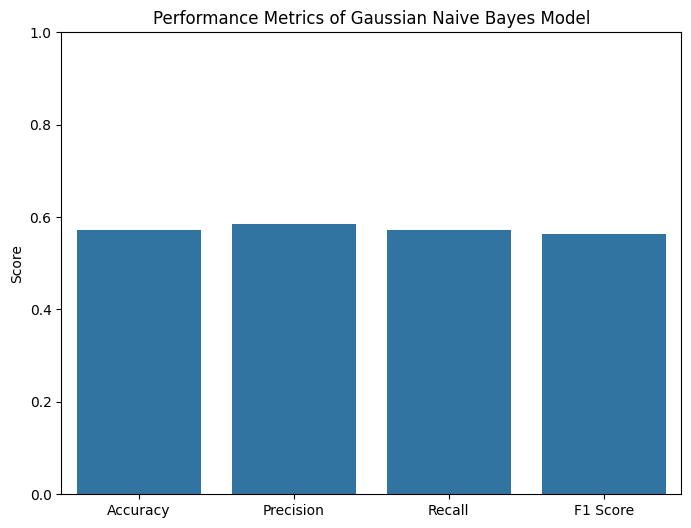

In [25]:
# Visualize Performance Metrics (Accuracy, Precision, Recall, F1 Score)
import seaborn as sns
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.ylim(0, 1)
plt.title('Performance Metrics of Gaussian Naive Bayes Model')
plt.ylabel('Score')
plt.show()